Travel Insurance Dataset Analysis with Seaborn and Pandas

Steps:
1. Load dataset from Kaggle
2. Clean and encode data
3. Visualize distribution, relationships, and correlations

In [1]:
import os
import pandas as pd
import kagglehub
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Step 1: Download and load data
path = kagglehub.dataset_download("mhdzahier/travel-insurance")
travel_csv = os.path.join(path, "travel insurance.csv")
df = pd.read_csv(travel_csv)
print("Loaded dataset from:", travel_csv)

100%|██████████| 463k/463k [00:00<00:00, 15.1MB/s]

Extracting files...


Loaded dataset from: /root/.cache/kagglehub/datasets/mhdzahier/travel-insurance/versions/1/travel insurance.csv


In [3]:
# Step 2.1: Handle missing values
print("Missing values per column:")
print(df.isnull().sum())

df.dropna(inplace=True)
print("\nShape after dropping missing values:", df.shape)


Missing values per column:
Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

Shape after dropping missing values: (18219, 11)


In [4]:
# Step 2.2: Type conversion
df['Claim'] = df['Claim'].map({'Yes': 1, 'No': 0})
df['Age'] = df['Age'].astype(int)
df['Duration'] = df['Duration'].astype(int)
df['Net Sales'] = df['Net Sales'].astype(float)
df['Commision (in value)'] = df['Commision (in value)'].astype(float)

print("\nData types after conversion:\n", df.dtypes)



Data types after conversion:
 Agency                   object
Agency Type              object
Distribution Channel     object
Product Name             object
Claim                     int64
Duration                  int64
Destination              object
Net Sales               float64
Commision (in value)    float64
Gender                   object
Age                       int64
dtype: object


In [5]:
# Step 2.3: One-hot encoding
categorical_cols = ['Agency', 'Agency Type', 'Distribution Channel',
                    'Product Name', 'Destination', 'Gender']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\nShape after encoding:", df_encoded.shape)
print(df_encoded.head())



Shape after encoding: (18219, 123)
    Claim  Duration  Net Sales  Commision (in value)  Age  Agency_ART  \
0       0       186      -29.0                  9.57   81       False   
1       0       186      -29.0                  9.57   71       False   
5       0        66     -121.0                 42.35   44       False   
11      0         1      -18.0                  6.30   47       False   
12      0        53     -130.0                 49.40   48       False   

    Agency_C2B  Agency_CBH  Agency_CCR  Agency_CSR  ...  \
0        False        True       False       False  ...   
1        False        True       False       False  ...   
5        False       False       False       False  ...   
11       False       False       False       False  ...   
12       False       False       False       False  ...   

    Destination_TAIWAN, PROVINCE OF CHINA  Destination_THAILAND  \
0                                   False                 False   
1                                   

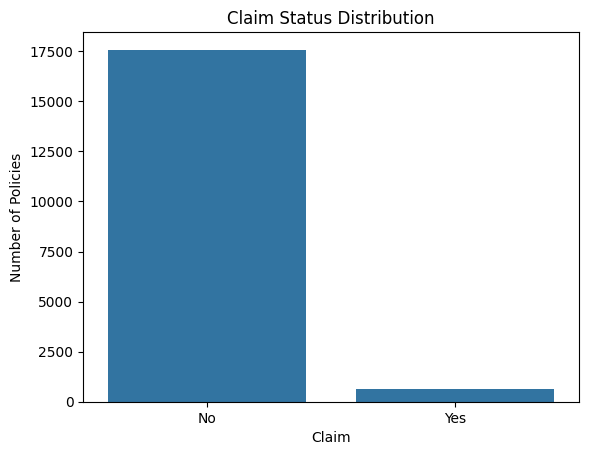

In [6]:
# Step 3.1: Claim status distribution
sns.countplot(data=df, x='Claim')
plt.title("Claim Status Distribution")
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel("Number of Policies")
plt.show()

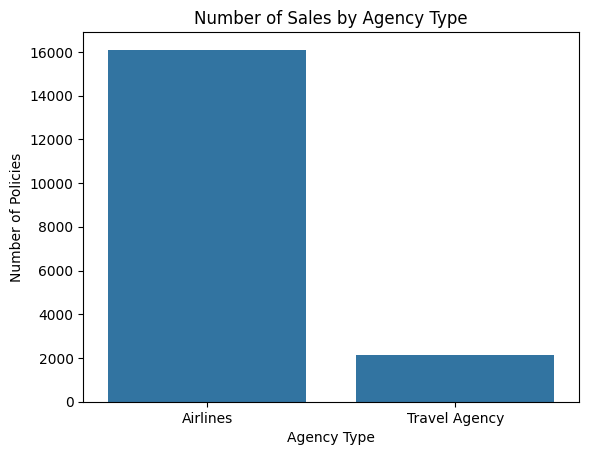

In [7]:
# Step 3.2: Sales by Agency Type
sns.countplot(data=df, x='Agency Type', order=df['Agency Type'].value_counts().index)
plt.title("Number of Sales by Agency Type")
plt.ylabel("Number of Policies")
plt.xlabel("Agency Type")
plt.show()

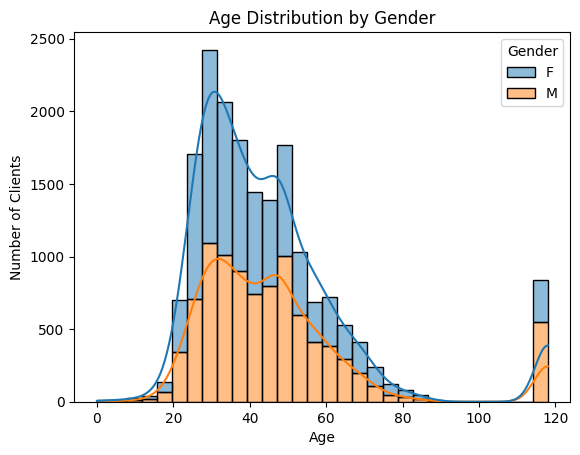

In [8]:
# Step 3.3: Age distribution by gender
sns.histplot(data=df, x='Age', hue='Gender', bins=30, kde=True, multiple='stack')
plt.title("Age Distribution by Gender")
plt.xlabel("Age")
plt.ylabel("Number of Clients")
plt.show()

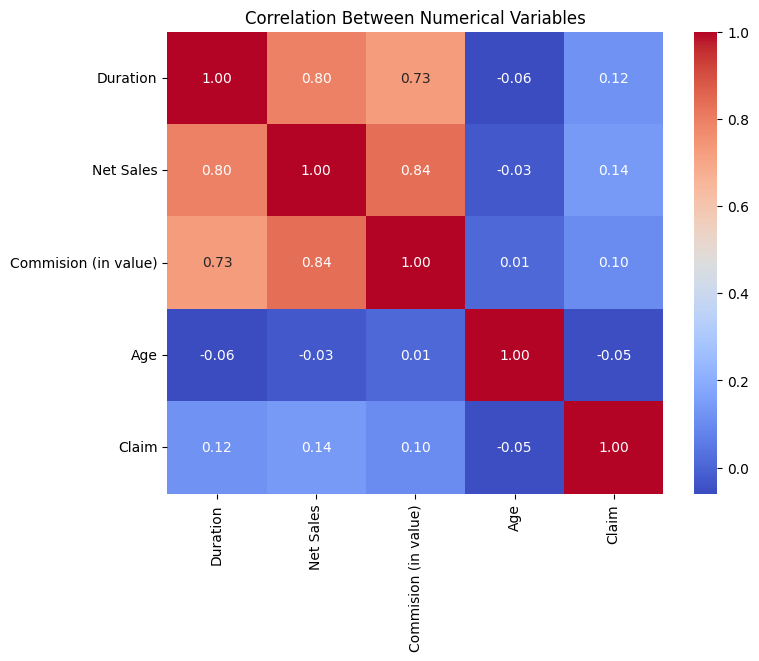

In [9]:
# Step 3.4: Correlation heatmap
corr = df[['Duration', 'Net Sales', 'Commision (in value)', 'Age', 'Claim']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Numerical Variables")
plt.show()